In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import BatchNormalization

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls /content/drive/MyDrive/kvasir

0_normal  1_ulcerative_colitis	2_polyps  3_esophagitis


## Resizing data

In [5]:
class SimpleResizePreprocessor:
    def __init__(self, width, height, inter=cv2.INTER_AREA):
        self.width = width
        self.height = height
        self.inter = inter

    def preprocess(self, image):
        return cv2.resize(image, (self.width, self.height), interpolation=self.inter)


## Grayscaling class

In [6]:
class SimpleGrayscalePreprocessor:
    def preprocess(self, image):
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## Normalization class

In [7]:
class SimpleNormalizationPreprocessor:
    def preprocess(self, image):
        return image / 255.0

## Gaussian Blur class

In [8]:
class GaussianBlurPreprocessor:
    def preprocess(self, image):
        blurred_image = cv2.GaussianBlur(image, (3, 3), 0)
        return blurred_image

## Load data

In [9]:
class SimpleDatasetLoader: #2nd Class
    def __init__(self, preprocessors=None):  #Constructor with parameter preprocessors initialized to none
        self.preprocessors = preprocessors #if preprocessors entered make them in a list
        if self.preprocessors is None:
            self.preprocessors = [] #if preprocessors is as initialized none make it an empty list

    def load(self, imagePaths, label, verbose=-1): #imagePaths: A list of file paths to the images that need to be loaded /label: The label to be assigned to each image.

        data = []
        labels = []

        for (i, imagePath) in enumerate(imagePaths): #enumerate() keeps track on the index of each image path in the list imagePaths with its corresponding index
            if True:
                image = cv2.imread(imagePath) #cv2.imread() method reads the image path and convert it into a numpy array
                label = label

                if image is None:
                    continue

                if self.preprocessors is not None:
                    for p in self.preprocessors: #if a prprocessor is provided apply it to the image
                        image = p.preprocess(image)
                    data.append(image)   #add image to data list
                    labels.append(label) #add label of the image to label ist
#             except:
#                 print("rasm yuq")
            if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
                print("[INFO] processed {}/{}".format(i + 1,len(imagePaths))) #print process info

        return (np.array(data), np.array(labels))

# Kvasir directories data processing

## Normal

In [10]:
normal = '/content/drive/MyDrive/kvasir/0_normal' #normal
normal_label = 0
imagePaths = os.listdir(normal) #image titles in the noprmal directory
imagePaths = [normal+"/"+i for i in imagePaths] #each image path by concatinanting the title with the directory
sp = SimpleResizePreprocessor(128, 128)
spg = SimpleGrayscalePreprocessor()
spn = SimpleNormalizationPreprocessor()
sdl = SimpleDatasetLoader(preprocessors=[sp,spn])
(data_normal, normal_labels) = sdl.load(imagePaths, verbose=200, label = normal_label)
print(data_normal.shape)
data = data_normal.reshape((data_normal.shape[0], -1))# 49152 = Total number of features = 128(width)*128(hight)*3(RGBchannels)// 128*128=Total Number of pixels
print(data.shape)
print("[INFO] features matrix: {:.1f}MB".format(data.nbytes / (1024 * 1024.0)))

[INFO] processed 200/1500
[INFO] processed 400/1500
[INFO] processed 600/1500
[INFO] processed 800/1500
[INFO] processed 1000/1500
[INFO] processed 1200/1500
[INFO] processed 1400/1500
(1500, 128, 128, 3)
(1500, 49152)
[INFO] features matrix: 562.5MB


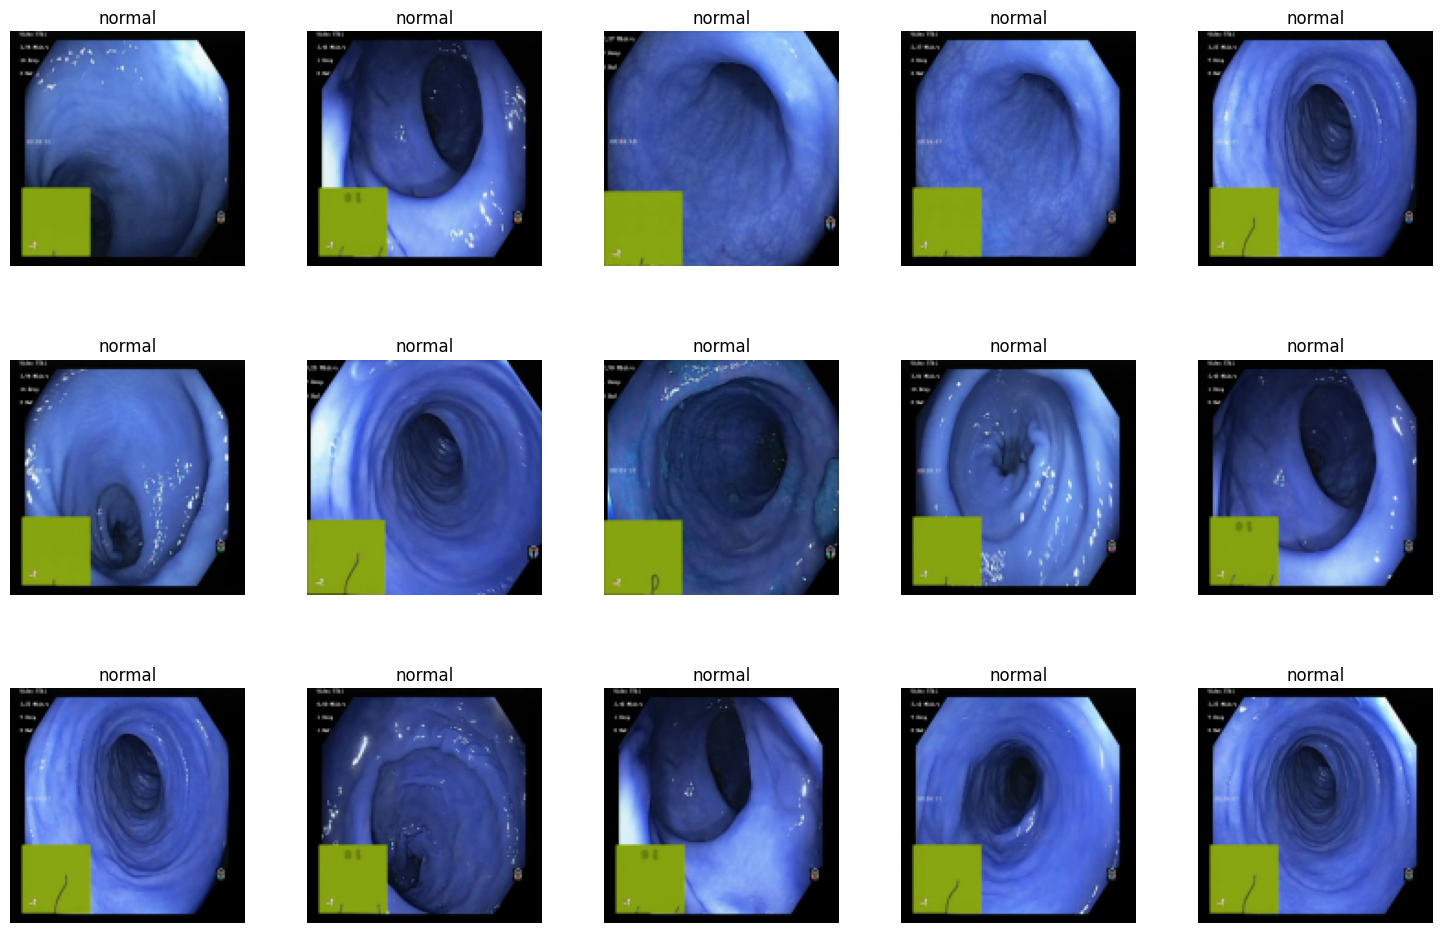

In [11]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
fig.tight_layout()  # Add spacing between subplots

# Loop through subplots
for ax in axes.flat:
    # Generate a random index to select an image from data_normal
    y = np.random.randint(len(data_normal))

    # Display the RGB image
    ax.imshow(data_normal[y])
    ax.set_title("normal")
    ax.axis('off')  # Turn off axis

plt.show()

## ulcerative_colitis

In [12]:
ulcerative_colitis = '/content/drive/MyDrive/kvasir/1_ulcerative_colitis'
ulcerative_colitis_label = 1
imagePaths = os.listdir(ulcerative_colitis) #image titles in the dyed_resection_margins directory
imagePaths = [ulcerative_colitis+"/"+i for i in imagePaths] #each image path by concatinanting the title with the directory

sp = SimpleResizePreprocessor(128, 128)
spg = SimpleGrayscalePreprocessor()
spn = SimpleNormalizationPreprocessor()
sdl = SimpleDatasetLoader(preprocessors=[sp,spn])
(data_ulcerative_colitis, ulcerative_colitis_labels) = sdl.load(imagePaths, verbose=200, label = ulcerative_colitis_label)
print(data_ulcerative_colitis.shape)
data = data_ulcerative_colitis.reshape((data_ulcerative_colitis.shape[0], -1))# 49152 = Total number of features = 128(width)*128(hight)*3(RGBchannels)// 128*128= 16384Total Number of pixels CASE OF GRASCALED
print(data.shape)
print("[INFO] features matrix: {:.1f}MB".format(data.nbytes / (1024 * 1024.0)))

[INFO] processed 200/1500
[INFO] processed 400/1500
[INFO] processed 600/1500
[INFO] processed 800/1500
[INFO] processed 1000/1500
[INFO] processed 1200/1500
[INFO] processed 1400/1500
(1500, 128, 128, 3)
(1500, 49152)
[INFO] features matrix: 562.5MB


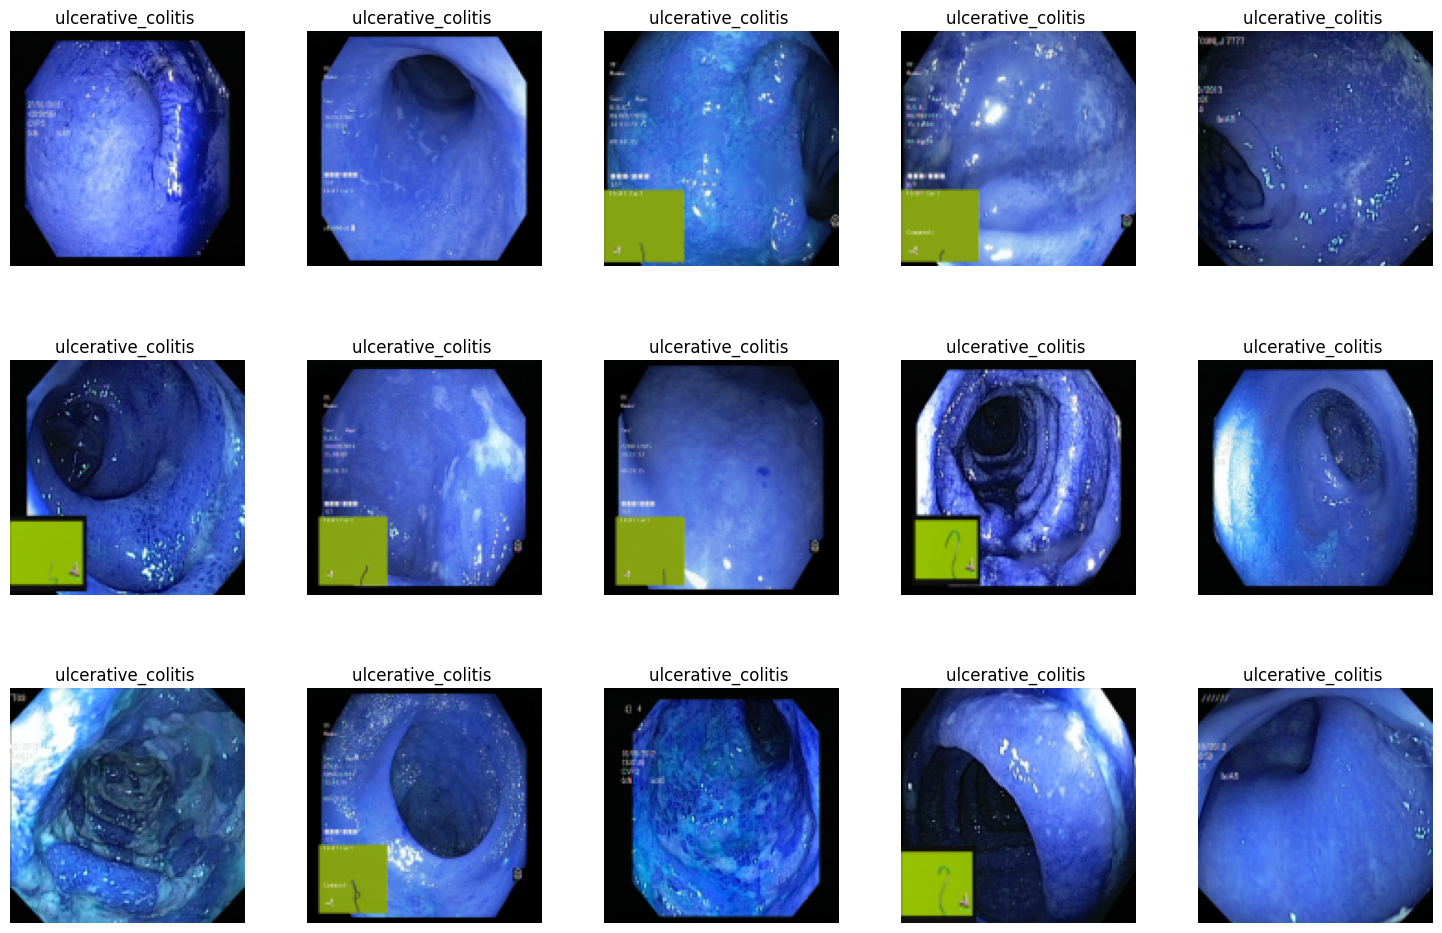

In [13]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
fig.tight_layout()  # Add spacing between subplots

# Loop through subplots
for ax in axes.flat:
    # Generate a random index to select an image from data_ulcerative_colitis
    y = np.random.randint(len(data_ulcerative_colitis))

    # Display the RGB image
    ax.imshow(data_ulcerative_colitis [y])
    ax.set_title("ulcerative_colitis ")
    ax.axis('off')  # Turn off axis

plt.show()

## polyps

In [14]:
polyps = '/content/drive/MyDrive/kvasir/2_polyps'  #polyps
polyps_label = 2
imagePaths = os.listdir(polyps) #image titles in the polyps directory
imagePaths = [polyps+"/"+i for i in imagePaths] #each image path by concatinanting the title with the directory
sp = SimpleResizePreprocessor(128, 128)
spg = SimpleGrayscalePreprocessor()
spn = SimpleNormalizationPreprocessor()
sdl = SimpleDatasetLoader(preprocessors=[sp,spn])
(data_polyps, polyps_labels) = sdl.load(imagePaths, verbose=200, label = polyps_label)
print(data_polyps.shape)
data = data_polyps.reshape((data_polyps.shape[0], -1))# 49152 = Total number of features = 128(width)*128(hight)*3(RGBchannels)// 128*128=Total Number of pixels
print(data.shape)
print("[INFO] features matrix: {:.1f}MB".format(data.nbytes / (1024 * 1024.0)))

[INFO] processed 200/1500
[INFO] processed 400/1500
[INFO] processed 600/1500
[INFO] processed 800/1500
[INFO] processed 1000/1500
[INFO] processed 1200/1500
[INFO] processed 1400/1500
(1500, 128, 128, 3)
(1500, 49152)
[INFO] features matrix: 562.5MB


In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
fig.tight_layout()  # Add spacing between subplots

# Loop through subplots
for ax in axes.flat:
    # Generate a random index to select an image from data_polyps
    y = np.random.randint(len(data_polyps))

    # Display the RGB image
    ax.imshow(data_polyps[y])
    ax.set_title("polyps")
    ax.axis('off')  # Turn off axis

plt.show()

## esophagitis


In [ ]:
esophagitis = '/content/drive/MyDrive/kvasir/3_esophagitis'  #esophagitis
esophagitis_label = 3
imagePaths = os.listdir(esophagitis) #image titles in the esophagitis directory
imagePaths = [esophagitis+"/"+i for i in imagePaths] #each image path by concatinanting the title with the directory
sp = SimpleResizePreprocessor(128, 128)
spg = SimpleGrayscalePreprocessor()
spn = SimpleNormalizationPreprocessor()
sdl = SimpleDatasetLoader(preprocessors=[sp,spn])
(data_esophagitis, esophagitis_labels) = sdl.load(imagePaths, verbose=200, label = esophagitis_label)
print(data_esophagitis.shape)
data = data_esophagitis.reshape((data_esophagitis.shape[0], -1))# 49152 = Total number of features = 128(width)*128(hight)*3(RGBchannels)// 128*128=Total Number of pixels
print(data.shape)
print("[INFO] features matrix: {:.1f}MB".format(data.nbytes / (1024 * 1024.0)))

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
fig.tight_layout()  # Add spacing between subplots

# Loop through subplots
for ax in axes.flat:
    # Generate a random index to select an image from data_esophagitis
    y = np.random.randint(len(data_esophagitis))

    # Display the RGB image
    ax.imshow(data_esophagitis[y])
    ax.set_title("esophagitis")
    ax.axis('off')  # Turn off axis

plt.show()

In [ ]:
df = pd.DataFrame({
    'dataset': ['esophagitis', 'normal', 'polyps', 'ulcerative_colitis'],
    'count_of_images': [len(data_esophagitis), len(data_normal), len(data_polyps), len(data_ulcerative_colitis)]})

# Pie chart to display data distribution
# px.pie(df, values='count', names='labels', title='Data distribution')
color = sns.color_palette('pastel')
plt.pie(df['count_of_images'], labels = df.dataset, colors = color, autopct='%.0f%%')

print(df)
plt.show()

In [ ]:
print("Sample labels from each dataset:")
print("Esophagitis labels:", esophagitis_labels[:5])
print("Normal labels:", normal_labels[:5])
print("Polyps labels:", polyps_labels[:5])
print("Ulcerative colitis labels:", ulcerative_colitis_labels[:5])

In [ ]:
final_data = np.concatenate([data_esophagitis, data_normal, data_polyps, data_ulcerative_colitis])
final_labels = np.concatenate([esophagitis_labels, normal_labels, polyps_labels, ulcerative_colitis_labels])
print(final_data.shape)
print(final_labels.shape)
print("[INFO] features matrix: {:.1f}MB".format(final_data.nbytes / (1024 * 1024.0)))


In [ ]:
(x_train, x_test, y_train, y_test) = train_test_split(final_data, final_labels, test_size=0.30, random_state=100)
# 30% of data for testing  and 70% for training
# x_train (training data), x_test (testing data), y_train (training labels), and y_test (testing labels)
# random_state to make the random split the same every time the code is run, ensuring consistent results.


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

## Construct CNN model

In [ ]:
from tensorflow.keras.activations import relu
model = Sequential() # define the layers one by one
model.add(Conv2D(32,(3,3), kernel_initializer='he_uniform',padding='same',input_shape=(128, 128, 3)))
model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add((Flatten()))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(4,activation = 'softmax'))
# (3,3) : kernel size
# activation fct : relu
# kernel_initialisation :  random edge weights uniformally
# input shape : width height 3channells RGB
# padding : same the spatial dimensions of the output feature maps will be the same as those of the input image


In [ ]:
opt = SGD(learning_rate=0.001,  ema_momentum= 0.95)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs = 28)


### Plot ACC and LOSS

In [ ]:
# evaluate the model
train_acc = model.evaluate(x_train, y_train, verbose=0)
test_acc = model.evaluate(x_test, y_test, verbose=0)

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()